In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sun Feb  9 13:23:28 2025

@author: profa
"""

########################################
## Example Set 2 - Gates
##
## Topics: 
    # Data gathering via API
    #  - URLs and GET
    # Cleaning and preparing text DATA
    # DTM and Data Frames
    # Training and Testing at DT
    # CLustering
    ## LDA
    
#########################################    
    
    
## ATTENTION READER...
##
## First, you will need to go to 
## https://newsapi.org/
## https://newsapi.org/register
## and get an API key

 

################## DO NOT USE MY KEY!!
## Get your own key. 
##
###################################################


### API KEY  - get a key!
##https://newsapi.org/

## Example URL
## https://newsapi.org/v2/everything?
## q=tesla&from=2021-05-20&sortBy=publishedAt&
## apiKey=YOUR KEY HERE


## What to import
import requests  ## for getting data from a server
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
import graphviz

from sklearn.decomposition import LatentDirichletAllocation 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram


####################################
##
##  Step 1: Connect to the server
##          Send a query
##          Collect and clean the 
##          results
####################################

####################################################
##In the following loop, we will query thenewsapi servers
##for all the topic names in the list
## We will then build a large csv file 
## where each article is a row
##
## From there, we will convert this data
## into a labeled dataframe
## so we can train and then test our DT
## model
####################################################

####################################################
## Build the URL and GET the results
## NOTE: At the bottom of this code
## commented out, you will find a second
## method for doing the following. This is FYI.
####################################################

## This is the endpoint - the server and 
## location on the server where your data 
## will be retrieved from

## TEST FIRST!
## We are about to build this URL:
## https://newsapi.org/v2/everything?apiKey=8f4134fYOUR



In [ ]:
filename = "combinedtextdata.csv"

BBC_DF=pd.read_csv(filename)
print(BBC_DF.head())
# iterating the columns 
for col in BBC_DF.columns: 
    print(col) 
    
print(BBC_DF["Combined"])

## REMOVE any rows with NaN in them
BBC_DF = BBC_DF.dropna()
print(BBC_DF["Combined"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
## Keep the labels!

textList = []
sourceLabels = []
leaningLabels = []
typeLabels = []
myStopWords = ["chars", "student", "loan", "debt"]
for i in range(len(BBC_DF)):
    index, source, leaning, tYPE, text = list(BBC_DF.loc[i])
    textList.append(text)
    sourceLabels.append(source)
    leaningLabels.append(leaning)
    typeLabels.append(tYPE)

print("The headline list is:\n")
print(textList)

print("The label list is:\n")
print(sourceLabels)
fixed = []
for text in textList:
    words = text.split()
    words = [x.lower() if x == x.upper() else x for x in words]
    words = [x for x in words if x not in myStopWords]
    words = [x for x in words if len(x)>1]
    text = " ".join(words)
    fixed.append(" ".join([x.strip() for x in re.findall('[A-Z][^A-Z]*', text)]).lower())
##########################################
## Remove all words that match the topics.
## For example, if the topics are food and covid
## remove these exact words.
##
## We will need to do this by hand. 
print(fixed)
HeadlineLIST=fixed



In [ ]:

### Vectorize
## Instantiate your CV
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        lowercase=True, 
        stop_words = "english",
        max_features=250
        )

## Use your CV 
MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
print(type(MyDTM))


ColumnNames=MyCountV.get_feature_names_out()
#print(type(ColumnNames))


## Build the data frame
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

## Convert the labels from list to df
Labels_DF = DataFrame({"source": sourceLabels, "leaning": leaningLabels, "type":typeLabels})

## Check your new DF and you new Labels df:
print("Labels\n")
print(Labels_DF)
print("News df\n")
print(MyDTM_DF.iloc[:,0:6])

##Save original DF - without the lables
My_Orig_DF=MyDTM_DF
print(My_Orig_DF)
######################
## AND - just to make sure our dataframe is fair
## let's remove columns called:
## food, bitcoin, and sports (as these are label names)
######################
#MyDTM_DF=MyDTM_DF.drop(topics, axis=1)


## Now - let's create a complete and labeled
## dataframe:
dfs = [Labels_DF, MyDTM_DF]

Final_News_DF_Labeled = pd.concat(dfs,axis=1, join='inner')
## DF with labels
#Final_News_DF_Labeled["feline"]
 

 


In [ ]:

#############################################
##
## Create Training and Testing Data
##
## Then model and test the Decision Tree
##
################################################


## Before we start our modeling, let's visualize and
## explore.

##It might be very interesting to see the word clouds 
## for each  of the topics. 
##--------------------------------------------------------
List_of_WC=[]

for mytopic in list(set(typeLabels)):
    print(mytopic)
    tempdf = Final_News_DF_Labeled[Final_News_DF_Labeled['type'] == mytopic]
    print(tempdf)
    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    #print(tempdf)
    
    #Make var name
    NextVarName=str("wc"+str(mytopic))
    #print( NextVarName)
    
    ##In the same folder as this code, I have three images
    ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
    #next_image=str(str(mytopic) + ".jpg")
    #print(next_image)
    
    ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
    
    ###########
    ## Create and store in a list the wordcloud OBJECTS
    #########
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=200).generate_from_frequencies(tempdf)
    
    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)
    

##------------------------------------------------------------------
print(List_of_WC)
##########
########## Create the wordclouds
##########
fig=plt.figure(figsize=(25, 25))
#figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics=2
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics,1,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds.pdf")
 
    
 


In [ ]:
###########################################################
##
##
##                  Clustering
##
##
############################################################
## Our DF
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        lowercase=True, 
        stop_words = "english",
        max_features=50,
        max_df = 300
        )

## Use your CV 
MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
print(type(MyDTM))


ColumnNames=MyCountV.get_feature_names_out()
#print(type(ColumnNames))


## Build the data frame
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

## Convert the labels from list to df
Labels_DF = DataFrame({"source": sourceLabels, "leaning": leaningLabels, "type":typeLabels})

## Check your new DF and you new Labels df:
print("Labels\n")
print(Labels_DF)
print("News df\n")
print(MyDTM_DF.iloc[:,0:6])

##Save original DF - without the lables
My_Orig_DF=MyDTM_DF
print(My_Orig_DF)
######################
## AND - just to make sure our dataframe is fair
## let's remove columns called:
## food, bitcoin, and sports (as these are label names)
######################
#MyDTM_DF=MyDTM_DF.drop(topics, axis=1)


## Now - let's create a complete and labeled
## dataframe:
dfs = [Labels_DF, MyDTM_DF]

Final_News_DF_Labeled = pd.concat(dfs,axis=1, join='inner')
Final_News_DF_Labeled.to_csv("kmeans.csv")
My_Orig_DF

/Users/menglert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 1 0]


/Users/menglert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/menglert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 0 0 ... 0 1 0]
1316
[[0.00000000e+00 8.39871846e-01 2.65281642e-01 ... 8.39871846e-01
  9.44156441e-01 4.66239487e-01]
 [8.39871846e-01 1.11022302e-16 7.70584266e-01 ... 8.88888889e-01
  9.61250787e-01 1.00000000e+00]
 [2.65281642e-01 7.70584266e-01 3.33066907e-16 ... 7.70584266e-01
  8.66654813e-01 5.41168532e-01]
 ...
 [8.39871846e-01 8.88888889e-01 7.70584266e-01 ... 1.11022302e-16
  6.90006297e-01 1.00000000e+00]
 [9.44156441e-01 9.61250787e-01 8.66654813e-01 ... 6.90006297e-01
  1.11022302e-16 8.45003148e-01]
 [4.66239487e-01 1.00000000e+00 5.41168532e-01 ... 1.00000000e+00
  8.45003148e-01 3.33066907e-16]]
1316
[[0.    0.84  0.265 ... 0.84  0.944 0.466]
 [0.84  0.    0.771 ... 0.889 0.961 1.   ]
 [0.265 0.771 0.    ... 0.771 0.867 0.541]
 ...
 [0.84  0.889 0.771 ... 0.    0.69  1.   ]
 [0.944 0.961 0.867 ... 0.69  0.    0.845]
 [0.466 1.    0.541 ... 1.    0.845 0.   ]]
['news article', 'news article', 'news article', 'news article', 'news article', 'news article', 'news artic

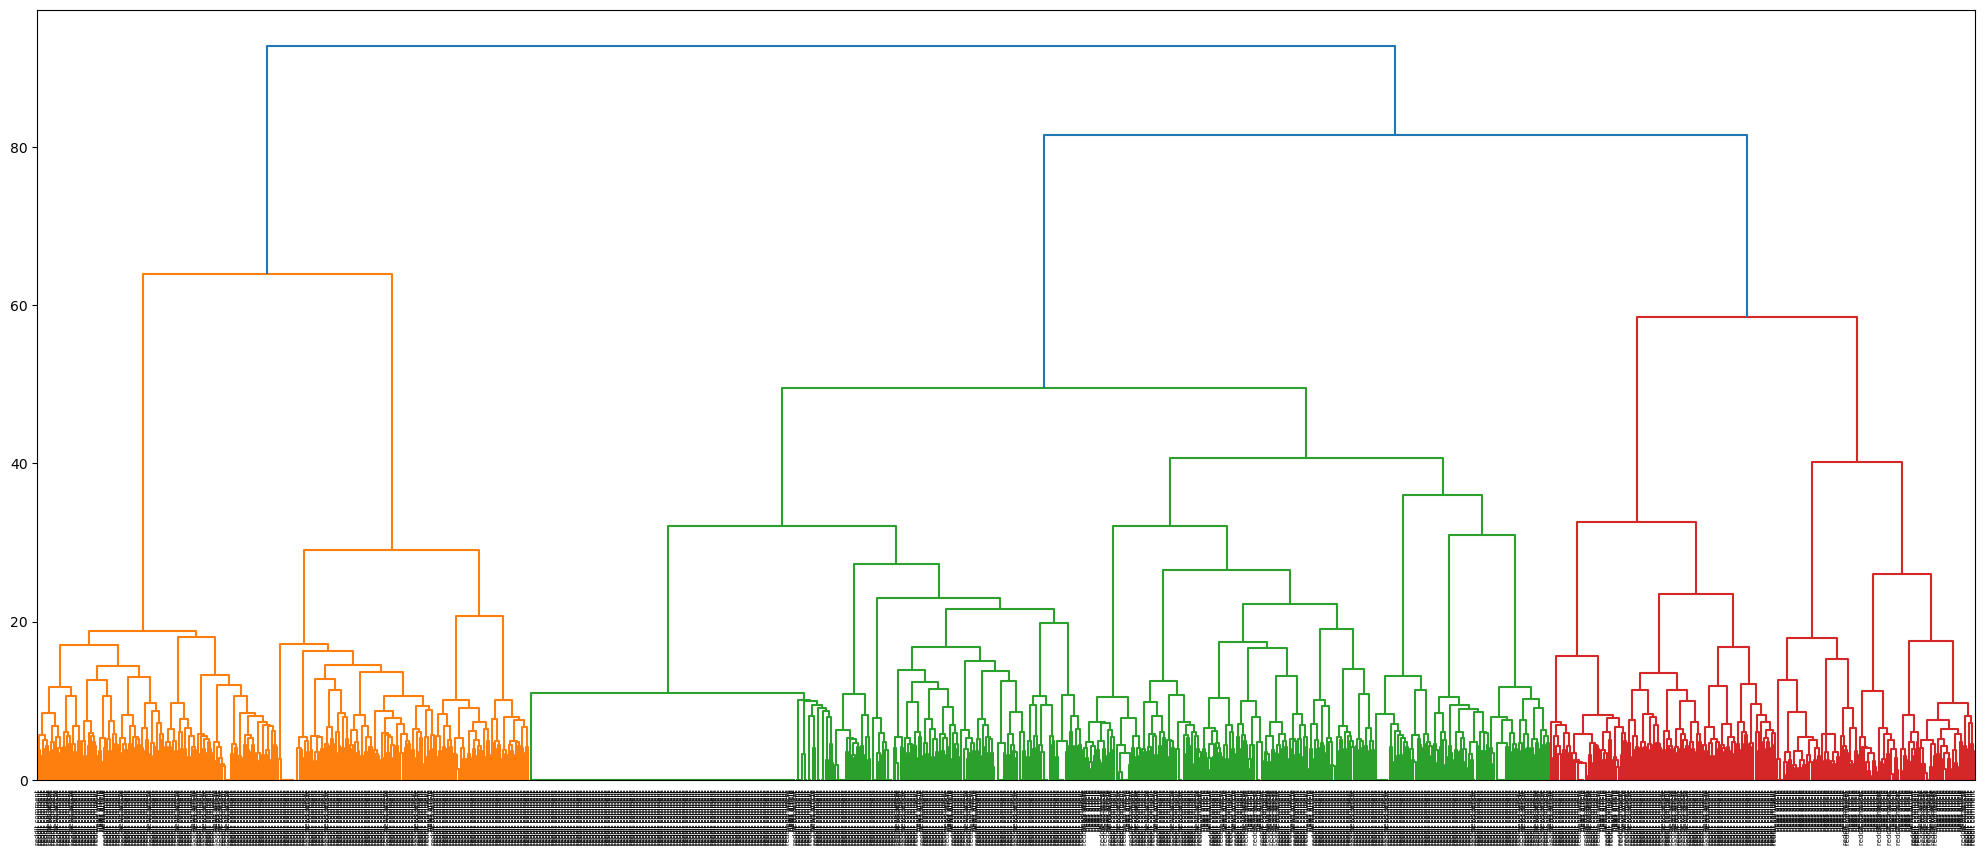

In [75]:

#from sklearn.metrics import silhouette_samples, silhouette_score
#from sklearn.cluster import KMeans

My_KMean= KMeans(n_clusters=2)
My_KMean.fit(My_Orig_DF)
My_labels=My_KMean.predict(My_Orig_DF)
print(My_labels)

#from sklearn import preprocessing
#from sklearn.cluster import KMeans
#import seaborn as sns

My_KMean2 = KMeans(n_clusters=2).fit(preprocessing.normalize(My_Orig_DF))
My_KMean2.fit(My_Orig_DF)
My_labels2=My_KMean2.predict(My_Orig_DF)
print(My_labels2)
'''
My_KMean3= KMeans(n_clusters=3)
My_KMean3.fit(My_Orig_DF)
My_labels3=My_KMean3.predict(My_Orig_DF)
print("Silhouette Score for k = 3 \n",silhouette_score(My_Orig_DF, My_labels3))
'''

#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#length of the document: called cosine similarity
print(len(My_Orig_DF))
cosdist = 1 - cosine_similarity(My_Orig_DF)
print(cosdist)
print(len(cosdist))
print(np.round(cosdist,3))  #cos dist should be .02

#----------------------------------------------------------
## Hierarchical Clustering using ward and cosine sim
labels=list(Final_News_DF_Labeled["type"])
print(labels)
print(len(labels))
print(type(labels))
linkage_matrix = ward(cosdist) #define the linkage_matrix 
#using ward clustering pre-computed distances
print(linkage_matrix)
print(len(linkage_matrix))
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(linkage_matrix, labels=labels, leaf_rotation=90)
plt.show()

 


In [ ]:

###############################################################
##
##               Model with two ML supervised options
##
##               DT
##               NB (multinomial)
##      
###############################################################         
## STEP 1   Create Training and Testing Data
###############################################################
## Write the dataframe to csv so you can use it later if you wish
##
Final_News_DF_Labeled.to_csv("Labeled_News_Data_from_API.csv")
TrainDF, TestDF = train_test_split(Final_News_DF_Labeled, test_size=0.3)
print(TrainDF)
print(TestDF)

#################################################
## STEP 2: Separate LABELS
#################################################
## IMPORTANT - YOU CANNOT LEAVE LABELS ON 
## Save labels

### TEST ---------------------
TestLabels=TestDF["LABEL"]
print(TestLabels)
TestDF = TestDF.drop(["LABEL"], axis=1)
print(TestDF)
### TRAIN----------------------
TrainLabels=TrainDF["LABEL"]
print(TrainLabels)
## remove labels
TrainDF = TrainDF.drop(["LABEL"], axis=1)

##################################################
## STEP 3:  Run MNB
##################################################

## Instantiate
MyModelNB= MultinomialNB()

## FIT
MyNB=MyModelNB.fit(TrainDF, TrainLabels)
#print(MyNB.classes_)
#print(MyNB.class_count_)
#print(MyNB.feature_log_prob_)


Prediction = MyModelNB.predict(TestDF)
print(np.round(MyModelNB.predict_proba(TestDF),2))

## COnfusion Matrix Accuracies
cnf_matrix = confusion_matrix(TestLabels, Prediction)
print("\nThe confusion matrix is:")
print(cnf_matrix)



In [ ]:

##################################################
## STEP 3:  Run DT
##################################################

## Instantiate
MyDT=DecisionTreeClassifier(criterion='entropy', ##"entropy" or "gini"
                            splitter='best',  ## or "random" or "best"
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            
                            class_weight=None)

##
MyDT.fit(TrainDF, TrainLabels)
print(ColumnNames)
print(len(ColumnNames))
print(Labels_DF)
print(type(Labels_DF))
## Convert to LIST
Labels_DF_List = Labels_DF["LABEL"].to_list()
print(Labels_DF_List)
print(type(Labels_DF_List))
print(len(Labels_DF_List))

plt.figure(figsize=(50,30))

plot_tree(MyDT, feature_names=ColumnNames, 
          class_names=Labels_DF_List, 
          filled=True,
          max_depth=5, 
          fontsize=10)
       
plt.show()

# If saving the figure is needed:
plt.savefig("decision_tree.jpeg")

## COnfusion Matrix
print("Prediction\n")
DT_pred=MyDT.predict(TestDF)
print(DT_pred)
    
bn_matrix = confusion_matrix(TestLabels, DT_pred)
print("\nThe confusion matrix is:")
print(bn_matrix)

feature_names=ColumnNames
FeatureImp=MyDT.feature_importances_   
indices = np.argsort(FeatureImp)[::-1]
## print out the important features.....
for f in range(TrainDF.shape[1]):
    if FeatureImp[indices[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indices[f], FeatureImp[indices[f]]))
        print ("feature name: ", feature_names[indices[f]])
        
        
 

In [ ]:
       
##############################################
##
##   LDA Topics Modeling
##
##
#########################################################
NUM_TOPICS=4
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=1000, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
   
lda_Z_DF = lda_model.fit_transform(My_Orig_DF)
print(lda_Z_DF.shape)  # (NO_DOCUMENTS, NO_TOPICS)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                    for i in topic.argsort()[:-top_n - 1:-1]])
 
print("LDA Model:")
print_topics(lda_model, MyCountV)


################ Another fun vis for LDA
plt.figure(figsize=(25,15))
word_topic = np.array(lda_model.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(ColumnNames)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 40

for t in range(NUM_TOPICS):
    plt.subplot(1, NUM_TOPICS, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base/2)
                 ##fontsize_base*share)


plt.savefig("TopicsVis.pdf")
plt.show()



In [68]:

#############################################
## Silhouette and clusters
#############################################

from sklearn.metrics import silhouette_samples, silhouette_score

## Using MyDTM_DF which is not labeled

# =============================================================================
KMean= KMeans(n_clusters=2)
KMean.fit(MyDTM_DF)
print(MyDTM_DF)
label=KMean.predict(MyDTM_DF)
print(label)
#     
#sns.scatterplot([MyDTM_DF.loc[0],MyDTM_DF.loc[1]], hue=label)
print("Silhouette Score for k=3\n",silhouette_score(MyDTM_DF, label))
#       #
# =============================================================================
kvalues = [2, 3, 5, 10]
 
for k in kvalues:
    KMean= KMeans(n_clusters=k)
    KMean.fit(MyDTM_DF)
    #print(MyDTM_DF)
    label=KMean.predict(MyDTM_DF)
    #print(label)
#     
    #sns.scatterplot([MyDTM_DF.loc[0],MyDTM_DF.loc[1]], hue=label)
    print("Silhouette Score for k=" + str(k) + "\n",silhouette_score(MyDTM_DF, label))
##############################
## Check These files now on your computer...
#############################################
## NewClouds.pdf
## TopicsVis.pdf
## InTheNews.html
## decision_tree.jpeg
## Labeled_News_Data_from_API.csv

/Users/menglert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      class  college  colleges  cost  costs  degree  department  dont  \
0         0        0         0     0      0       0           0     0   
1         0        0         0     0      0       0           0     0   
2         0        0         0     0      0       0           0     0   
3         0        0         0     0      0       0           2     0   
4         0        0         0     0      0       0           0     0   
...     ...      ...       ...   ...    ...     ...         ...   ...   
1311      0        0         0     0      0       0           0     1   
1312      0        0         0     0      0       0           0     0   
1313      0        1         0     0      0       0           0     0   
1314      0        5         0     2      1       1           0     3   
1315      0        0         0     0      0       0           0     0   

      economy  education  ...  tax  think  time  trump  tuition  university  \
0           0          0  ...    0      0   

/Users/menglert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/menglert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=3
 0.3595894257858035


/Users/menglert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=5
 0.35164115049606276


/Users/menglert/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score for k=10
 0.25309158148819955


In [69]:
Final_News_DF_Labeled["transaction"] = Final_News_DF_Labeled["LABEL"]
Final_News_DF_Labeled
columns = Final_News_DF_Labeled.columns[1:-1]
for i in range(len(columns)):
    #print(columns[i])
    newtrans = Final_News_DF_Labeled[columns[i]].apply(lambda x: "" if x == 0 else ","+columns[i])
    Final_News_DF_Labeled["transaction"] = Final_News_DF_Labeled["transaction"] + newtrans

Final_News_DF_Labeled
labels = Final_News_DF_Labeled["LABEL"]
DF = Final_News_DF_Labeled.drop(["transaction", "LABEL"], axis=1)
DF

KeyError: 'LABEL'

In [ ]:
Final_News_DF_Labeled["transaction"].to_csv("transactiondataexam2.csv")

In [70]:

nums = {"news article": 0, "reddit comment": 1}
labels_remap = [nums[x] for x in typeLabels]
labels_remap

words = My_Orig_DF.columns
print(len(words))
#OriginalDF=Final_News_DF_Labeled.copy()

50


In [71]:
####-----------------------------------------------------------
#### PCA and Pairwise Correlation
##   3D Scatterplot
##   !! Dataset !!  (A sample of this data was used in this code)
##   Link to Full Iris Dataset from Kaggle:
##   https://www.kaggle.com/datasets/uciml/iris?resource=download
##
## Gates, 2024
####------------------------------------------------------------
##
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

##This is a small sample of the Iris dataset (link above)
## !!! This is MY path :)  YOU need to update this to be YOUR path !!!

###-------------------------------------------
### Standardize your dataset
###-------------------------------------------
DF = My_Orig_DF.copy()
scaler = StandardScaler() ##Instantiate
DF=scaler.fit_transform(DF) ## Scale data
pd.DataFrame(DF)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.206018,-0.422362,-0.19746,-0.278577,-0.235926,-0.238653,-0.168155,-0.287652,-0.16822,-0.360165,...,-0.134719,-0.290282,-0.249460,2.857584,-0.294377,-0.223307,-0.216222,-0.242364,-0.291199,-0.287795
1,-0.206018,-0.422362,-0.19746,-0.278577,-0.235926,-0.238653,-0.168155,-0.287652,-0.16822,-0.360165,...,-0.134719,-0.290282,-0.249460,-0.251619,-0.294377,4.800152,-0.216222,-0.242364,-0.291199,-0.287795
2,-0.206018,-0.422362,-0.19746,-0.278577,-0.235926,-0.238653,-0.168155,-0.287652,-0.16822,-0.360165,...,-0.134719,-0.290282,-0.249460,-0.251619,-0.294377,-0.223307,-0.216222,-0.242364,-0.291199,-0.287795
3,-0.206018,-0.422362,-0.19746,-0.278577,-0.235926,-0.238653,4.590825,-0.287652,-0.16822,2.556621,...,-0.134719,-0.290282,-0.249460,5.966786,-0.294377,-0.223307,-0.216222,-0.242364,-0.291199,-0.287795
4,-0.206018,-0.422362,-0.19746,-0.278577,-0.235926,-0.238653,-0.168155,-0.287652,-0.16822,-0.360165,...,-0.134719,-0.290282,-0.249460,-0.251619,-0.294377,-0.223307,-0.216222,-0.242364,-0.291199,-0.287795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,-0.206018,-0.422362,-0.19746,-0.278577,-0.235926,-0.238653,-0.168155,1.992771,-0.16822,1.098228,...,-0.134719,-0.290282,-0.249460,-0.251619,-0.294377,-0.223307,-0.216222,-0.242364,-0.291199,-0.287795
1312,-0.206018,-0.422362,-0.19746,-0.278577,-0.235926,-0.238653,-0.168155,-0.287652,-0.16822,-0.360165,...,-0.134719,-0.290282,-0.249460,-0.251619,-0.294377,-0.223307,-0.216222,-0.242364,-0.291199,-0.287795
1313,-0.206018,0.728422,-0.19746,-0.278577,-0.235926,-0.238653,-0.168155,-0.287652,-0.16822,-0.360165,...,-0.134719,2.256455,4.724623,-0.251619,1.412230,-0.223307,-0.216222,-0.242364,-0.291199,-0.287795
1314,-0.206018,5.331560,-0.19746,4.513671,2.665745,2.087775,-0.168155,6.553618,-0.16822,1.098228,...,-0.134719,2.256455,-0.249460,-0.251619,-0.294377,-0.223307,9.062536,2.795261,3.919985,-0.287795


In [72]:
###############################################
###--------------PERFORM PCA------------------
###############################################
## Instantiate PCA and choose how many components
MyPCA=PCA(n_components=3)
# Project the original data into the PCA space
Result=MyPCA.fit_transform(DF)
## Print the values of the first component 
#print(Result[:,0]) 
print(Result) ## Print the new (transformed) dataset
print("The eigenvalues:", MyPCA.explained_variance_)
## Proof
MyCov=np.cov(Result.T)
print("Covar of the PC PCA Matrix: \n", MyCov) ## The variance here (on the diagonal) will match the eigenvalues
print("The relative eigenvalues are:",MyPCA.explained_variance_ratio_)
print("The actual eigenvalues are:", MyPCA.explained_variance_)
EVects=MyPCA.components_
print("The eigenvectors are:\n",EVects)
print(type(EVects))
print("The shape of the eigenvector matrix is\n", EVects.shape)
print(DF.shape)
print(DF)
## Proof to transform origial data to eigenbasis
## using the eigenvectors matrix.
print(EVects.T)
##  (15, 4) @ (4, 3)
Transf=DF@EVects.T
print("Proof that the transformed data is the EVects @ Data\n",Transf)


[[-0.97053555  5.24122387 -1.40558776]
 [-0.64955733 -0.16594767  1.96820913]
 [-0.69579514  3.25533628 -0.10156207]
 ...
 [ 0.26473822 -0.02686895  0.01054194]
 [ 8.91911316 -0.58363283  0.47844887]
 [-0.04702869  0.8555454   1.08333737]]
The eigenvalues: [5.18672992 2.84246965 2.48878161]
Covar of the PC PCA Matrix: 
 [[ 5.18672992e+00 -7.34689031e-16 -1.62101004e-16]
 [-7.34689031e-16  2.84246965e+00 -2.35046456e-15]
 [-1.62101004e-16 -2.35046456e-15  2.48878161e+00]]
The relative eigenvalues are: [0.10365577 0.05680619 0.04973781]
The actual eigenvalues are: [5.18672992 2.84246965 2.48878161]
The eigenvectors are:
 [[ 0.10261185  0.19913707  0.15134097  0.15580104  0.16962678  0.14812567
  -0.03015997  0.19110779  0.1471106   0.0861727   0.05632295  0.03131171
   0.13160063  0.18202365  0.10474461  0.13511912  0.09972864  0.12504401
   0.12059281  0.19113274  0.17138342  0.16615221  0.13164816  0.10484045
   0.18015397  0.20286718  0.19178409  0.12801071  0.17954729  0.16396349
   

[[ 0.1026101   0.19913672  0.15133867  0.15580023  0.16962742  0.14812677
  -0.03016018  0.19110714  0.14711073  0.08617304  0.05632372  0.03131174
   0.13160143  0.18202556  0.10474326  0.13511819  0.09972955  0.12504626
   0.12059223  0.19113337  0.17138112  0.16615245  0.13164773  0.10483996
   0.18015123  0.20286629  0.19178176  0.12801267  0.17954946  0.16396526
   0.20954446 -0.03991511  0.10590545  0.0816405   0.1080405   0.13174939
   0.1615759   0.12545357 -0.02650644  0.1357965   0.11355448  0.16973269
   0.12832694 -0.05545262  0.12907627  0.10791209  0.15372105  0.16183847
   0.16648705  0.18231839]
 [-0.02151721 -0.03022258  0.01839457  0.05515896  0.02046109 -0.05893154
   0.38908257 -0.07495502 -0.06063114  0.34644227  0.3319445   0.12211462
   0.00193353 -0.06247208 -0.0288059   0.07904819 -0.01584579  0.09626522
  -0.00887377 -0.06520491 -0.05049941  0.25941877 -0.04854308  0.00868918
  -0.0281112  -0.07809546 -0.0192283  -0.00106479  0.03209776 -0.01470736
  -0.071609

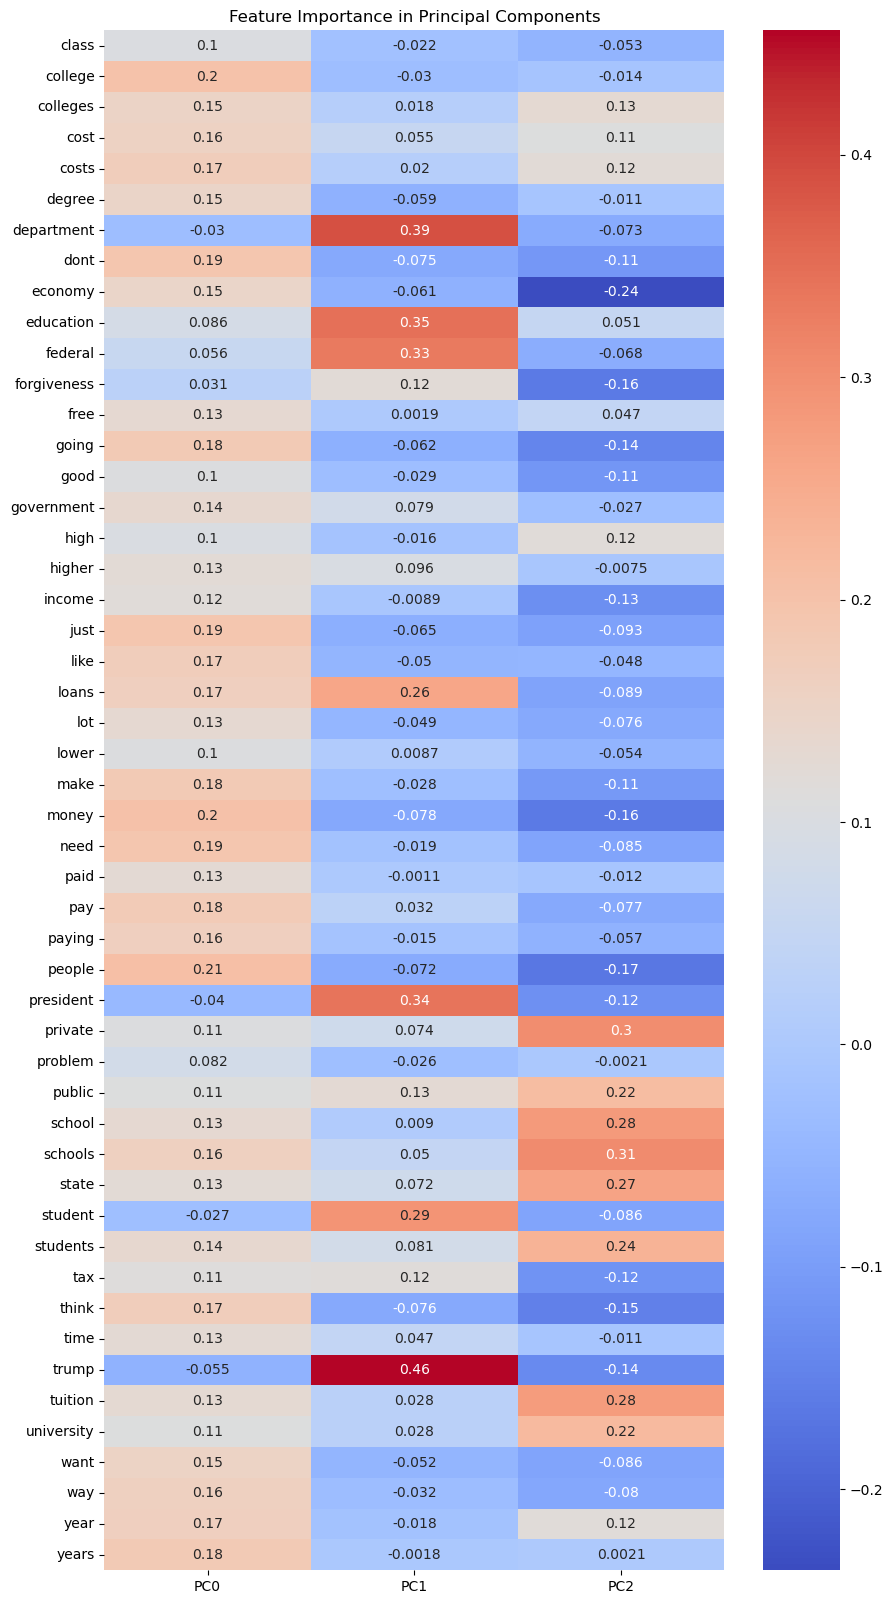

In [49]:

################################################
# Extract loadings
## Rerun PCA with all columns - no dim reduction
############################################################
MyPCA2=PCA(n_components=3)
# Project the original data into the PCA space
Result2=MyPCA2.fit_transform(DF)
print(MyPCA2.components_) 
print(MyPCA2.components_.T) ## Makes the eigenvectors columnwise
print(MyPCA2.explained_variance_ratio_) 


#print(OriginalDF.columns[0:4])

'''for i in range(1, len(DF[0:4].columns)):
               print(i)'''
               
loadings = pd.DataFrame(MyPCA2.components_.T, 
                        columns=[f'PC{i}' for i in range(0, 3)], 
                        index=words)
print(loadings)

## Print the most important variables using a threshold
threshold = 0.4
# Find features with loadings above the threshold for each principal component
important_features = {}
for column in loadings.columns:
    important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# Now 'important_features' dictionary contains the important features for each PC
for pc, features in important_features.items():
    print(f"{pc}: {', '.join(features)}")

# Plot heatmap of loadings
plt.figure(figsize=(10, 20))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Feature Importance in Principal Components')
plt.show()


[ 5.24122387 -0.16594767  3.25533628 ... -0.02686895 -0.58363283
  0.8555454 ]


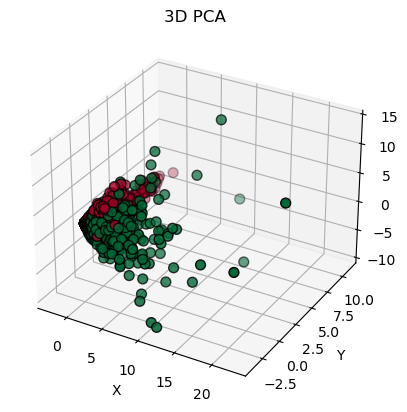

<Figure size 640x480 with 0 Axes>

In [73]:

#################################################
## Visualize the transformed 3D dataset
## we just created using PCA
#################################################

fig2 = plt.figure()
    #figsize=(12, 12))
ax2 = fig2.add_subplot(projection='3d')
#Axes3D(fig2, rect=[0, 0, .90, 1], elev=48, azim=134)

x=Result[:,0]
y=Result[:,1] 
z=Result[:,2]
print(y)

ax2.scatter(x,y,z, cmap="RdYlGn", edgecolor = "k", s=50, c=labels_remap)
#surf2 = ax2.plot_surface(x, y, z, cmap='viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_title('3D PCA')
#
plt.show()
plt.savefig("MyImage.jpeg")


education
forgiveness
trump
[ 5.18672992  8.02919957 10.51798118]
[0.10365577 0.05680619 0.04973781]


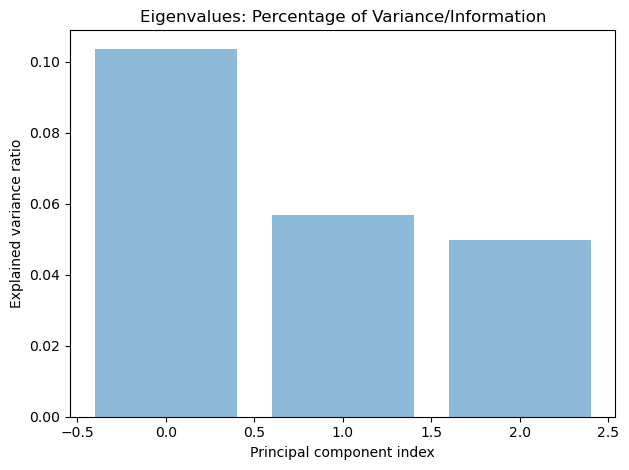

     0        1
0  PC0   people
1  PC1    trump
2  PC2  schools


In [74]:
print(words[9])
print(words[11])
print(words[43])
############################################
## Create Plot to Show Eigenvalues
############################################
fig3=plt.figure()
ACCUM_eigenvalues = np.cumsum(MyPCA.explained_variance_)
print(ACCUM_eigenvalues)
print(MyPCA.explained_variance_ratio_)
plt.bar(range(0,len(MyPCA.explained_variance_ratio_)), MyPCA.explained_variance_ratio_, 
        alpha=0.5, align='center', label='Individual Explained Variances')
#plt.step(range(0,len(ACCUM_eigenvalues)), ACCUM_eigenvalues, where='mid',label='Cumulative Explained Variances')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title("Eigenvalues: Percentage of Variance/Information")
#plt.legend(loc='best')
plt.tight_layout()
plt.show()

###############################################
## Create a DF of the most important features
##################################################
shape= MyPCA.components_.shape[0]
#print(shape)
feature_names=words

most_important = [np.abs(MyPCA.components_[i]).argmax() for i in range(shape)]
most_important_names = [feature_names[most_important[i]] for i in range(shape)]

# Build a doctionary of the imprtant features by PC
MyDic = {'PC{}'.format(i): most_important_names[i] for i in range(shape)}

# build the dataframe
Important_DF = pd.DataFrame(MyDic.items())
print(Important_DF)



[[ 0.10261042 -0.02155093 -0.05199343]
 [ 0.19913613 -0.03033557 -0.01308757]
 [ 0.15133838  0.01822847  0.1304407 ]
 [ 0.1558006   0.05496476  0.10984374]
 [ 0.16962706  0.02036431  0.12182265]
 [ 0.14812673 -0.05882072 -0.01166456]
 [-0.03016044  0.38910526 -0.0725457 ]
 [ 0.19110718 -0.07489073 -0.10954655]
 [ 0.14711101 -0.06043665 -0.23705835]
 [ 0.08617289  0.34639887  0.05160371]
 [ 0.05632364  0.33205176 -0.0687385 ]
 [ 0.03131201  0.12207249 -0.16227518]
 [ 0.13160167  0.00196594  0.04704425]
 [ 0.1820251  -0.06229017 -0.14341443]
 [ 0.10474402 -0.02873912 -0.11243453]
 [ 0.13511811  0.07897142 -0.02716717]
 [ 0.09972966 -0.01576361  0.12046661]
 [ 0.1250459   0.09612221 -0.00773441]
 [ 0.12059167 -0.00885256 -0.12543568]
 [ 0.19113354 -0.0654716  -0.09316367]
 [ 0.1713832  -0.05072125 -0.04814204]
 [ 0.16615192  0.2593994  -0.08914937]
 [ 0.13164788 -0.04868487 -0.0751206 ]
 [ 0.10483987  0.00861531 -0.05358282]
 [ 0.18015113 -0.02816054 -0.10728855]
 [ 0.20286641 -0.07807902

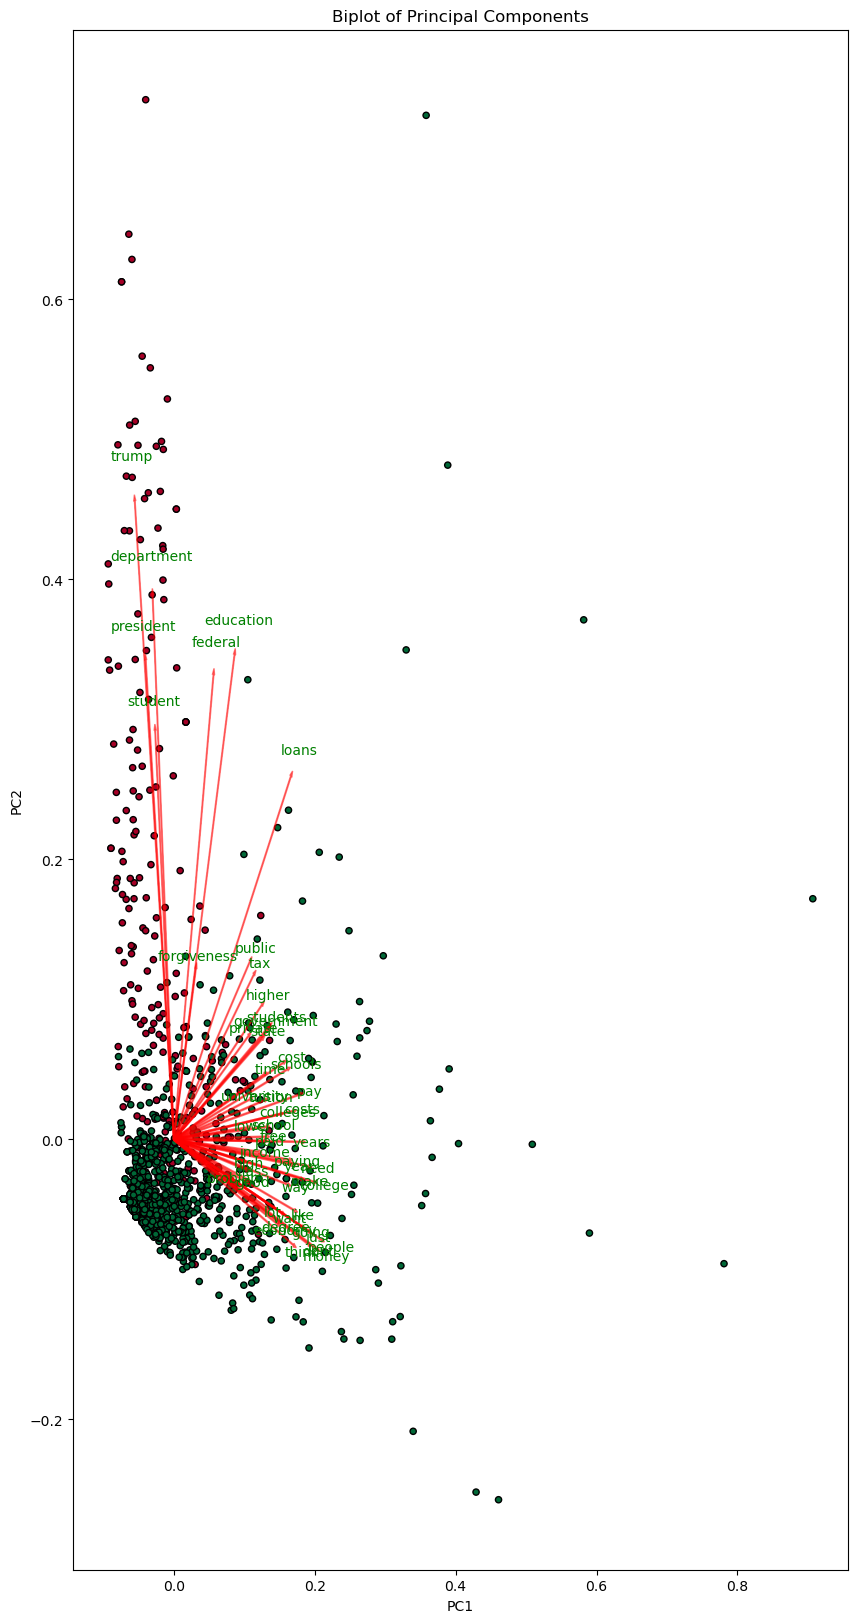

In [55]:

###############################################
## Create a biplot of the most important features
##################################################
PCA_dataset= Result ## recall that we ran PCA with 3 to get this above
EVectors_as_columns=EVects.T
print(EVectors_as_columns)
## PCA  dataset
print(PCA_dataset)

DFLabel = labels_remap

def biplot(PCA_dataset, EVectors_as_columns, labels=feature_names):
    xs = PCA_dataset[:, 0]
    ys = PCA_dataset[:, 1]
    n = EVectors_as_columns.shape[0]
   
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    plt.scatter(xs*scalex, ys*scaley, cmap="RdYlGn", edgecolor='k', s=20, c=DFLabel)
              
    for i in range(n):
        plt.arrow(0, 0, EVectors_as_columns[i, 0], EVectors_as_columns[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(EVectors_as_columns[i, 0] * 1.07 , EVectors_as_columns[i, 1] * 1.07, 
                     "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(EVectors_as_columns[i, 0] * 1.07, 
                     EVectors_as_columns[i, 1] * 1.07, labels[i], color='g', 
                     ha='center', va='center')

# Plot biplot
plt.figure(figsize=(10, 20))
#figsize=(10, 16)
biplot(PCA_dataset, EVectors_as_columns, labels=feature_names)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot of Principal Components')
plt.show()